In [70]:
import pandas as pd
data=pd.read_csv('users_combined_info_500.csv')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294776 entries, 0 to 1294775
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1294776 non-null  int64  
 1   name             1294776 non-null  object 
 2   location         1294776 non-null  object 
 3   total_influence  1294776 non-null  float64
 4   country          1206625 non-null  object 
 5   event_type       1294776 non-null  object 
 6   event_action     1294776 non-null  object 
 7   event_time       1294776 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 79.0+ MB


In [72]:
data.head(5)

,user_id,name,location,total_influence,country,event_type,event_action,event_time
0,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:28:37+08:00
1,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:42:57+08:00
2,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 04:10:46+08:00
3,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 17:43:50+08:00
4,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 19:56:34+08:00


In [73]:
data.isnull().sum()

user_id                0
name                   0
location               0
total_influence        0
country            88151
event_type             0
event_action           0
event_time             0
dtype: int64

In [74]:
country_counts = data['country'].value_counts().head(15)

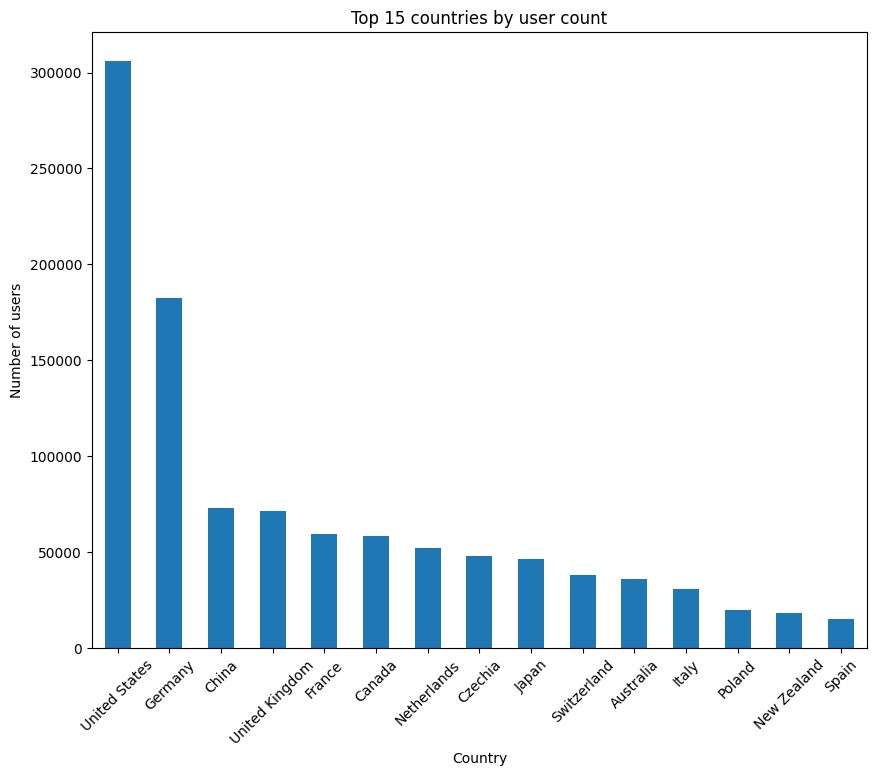

In [75]:
import matplotlib.pyplot as plt
ax=country_counts.plot(kind='bar',figsize=(10,8))
plt.title('Top 15 countries by user count')
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
ax.get_figure().savefig('country_counts.png')
plt.show()

In [76]:
city_counts = data['location'].value_counts().head(15)

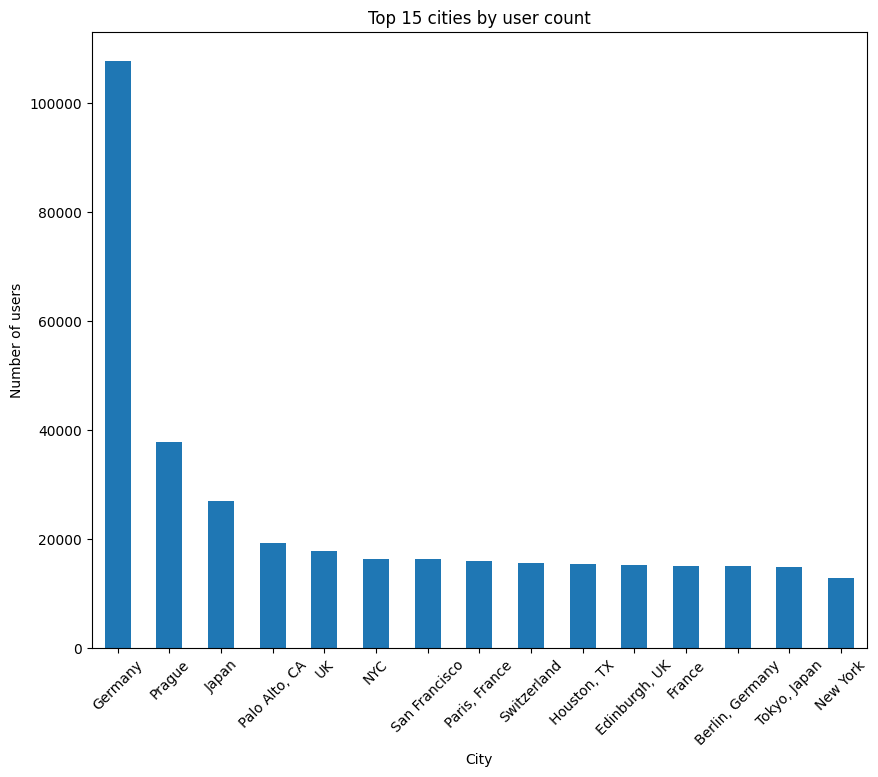

In [77]:
ax=city_counts.plot(kind='bar',figsize=(10,8))
plt.title('Top 15 cities by user count')
plt.xlabel('City')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
ax.get_figure().savefig('city_count.png')
plt.show()

In [78]:
data['event_time']=pd.to_datetime(data['event_time'])


In [79]:
data['event_time_cst']=data['event_time'].dt.tz_convert('Asia/Shanghai')

In [80]:
data['hour'] = data['event_time_cst'].dt.hour

In [81]:
pivot_table=pd.pivot_table(data,values='user_id',index='country',columns='hour',aggfunc='count',fill_value=0)

In [82]:
pivot_table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
country,,,,,,,,,,,,,,,,,,,,,
Australia,3012,2675,2586,2296,2083,1936,1722,1681,1443,1911,...,597,697,401,273,300,437,1054,1312,2199,2338
Austria,51,16,3,4,26,148,191,606,841,981,...,595,548,634,813,660,671,494,318,220,1117
Belgium,47,8,7,60,87,210,241,440,466,361,...,287,329,322,370,491,633,479,376,203,101
Brazil,220,207,424,82,66,23,19,11,10,39,...,419,297,211,222,336,420,188,102,200,173
Bulgaria,125,38,23,78,215,292,483,604,710,425,...,387,246,268,313,296,260,174,89,69,72
Canada,2274,1976,1790,1331,1744,1161,909,927,1436,978,...,3684,3739,4393,3438,3374,3240,3352,2946,3377,2424
China,1284,2803,5602,5192,3440,3468,4961,5275,5313,5605,...,3537,2816,2079,1553,1651,1097,794,633,575,745
Colombia,116,75,54,17,18,2,15,33,80,119,...,180,84,134,103,120,94,135,153,183,168
Czechia,1236,1174,495,214,176,1754,3213,3486,3752,3699,...,2011,1853,3170,1151,999,1138,1189,1931,2474,3283


In [83]:
pivot_table['总和'] = pivot_table.sum(axis=1)
pivot_table_sorted = pivot_table.sort_values(by='总和', ascending=False)

In [84]:
pivot_table_sorted.to_csv('不同国家一天中不同时间的协作次数.csv')

C:\Users\17100\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\17100\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\17100\AppData\Local\Temp\ipykernel_29096\4289829527.py:5: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from font(s) DejaVu Sans.
  plt.savefig('Country_Users_Hours.png')
C:\Users\17100\AppData\Local\Temp\ipykernel_29096\4289829527.py:5: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  plt.savefig('Country_Users_Hours.png')
C:\Users\17100\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\17100\App

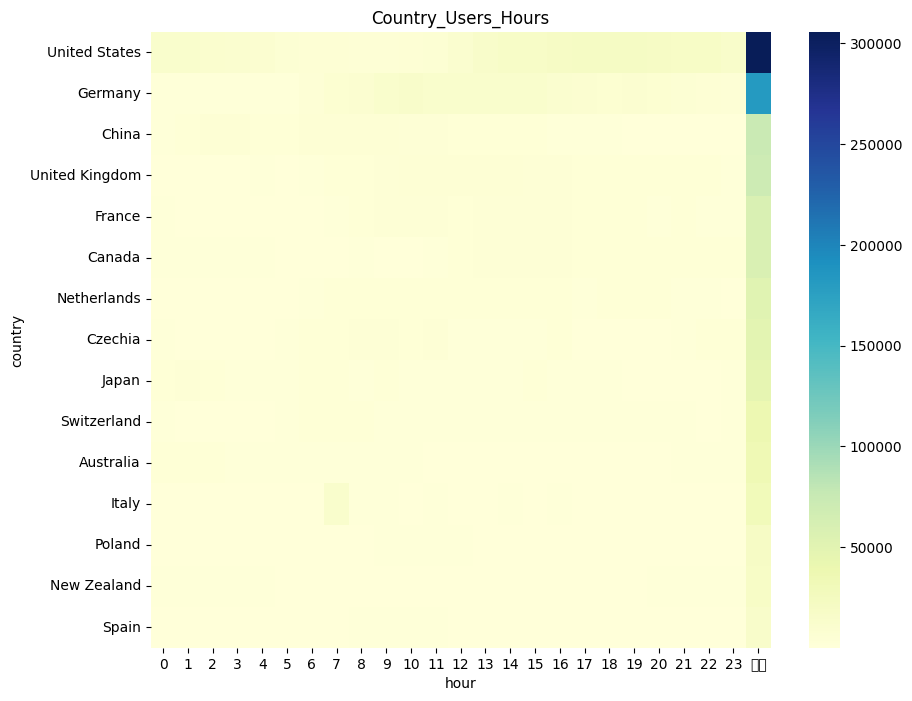

In [85]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table_sorted.head(15),cmap='YlGnBu',fmt='d',cbar=True)
plt.title('Country_Users_Hours')
plt.savefig('Country_Users_Hours.png')
plt.show()

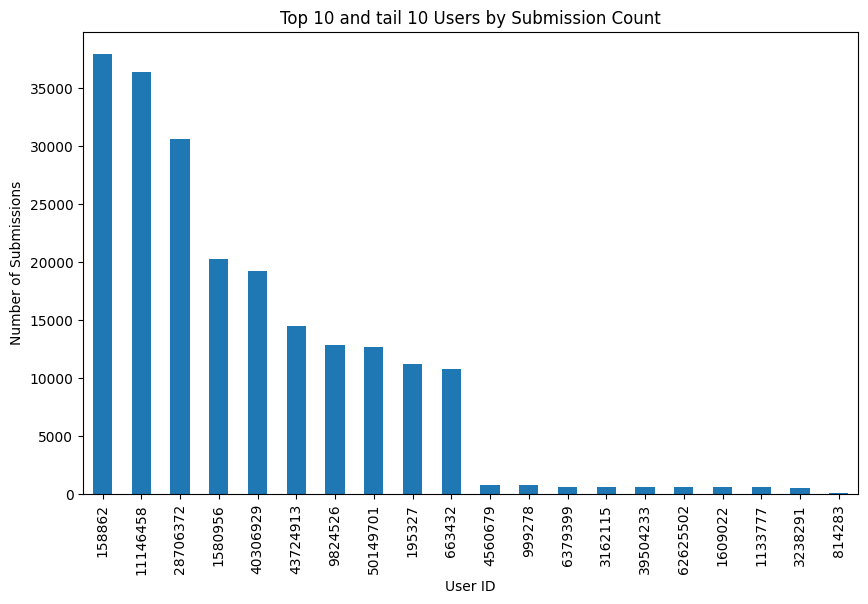

In [86]:
# 统计每个用户的提交次数
user_submission_counts = data['user_id'].value_counts()
user_submission_counts.to_csv('user_submission_counts.csv')

# 可视化
ax=pd.concat([user_submission_counts.head(10),user_submission_counts.tail(10)]).plot(kind='bar', figsize=(10,6))
plt.title('Top 10 and tail 10 Users by Submission Count')
plt.xlabel('User ID')
plt.ylabel('Number of Submissions')
ax.get_figure().savefig('user_submission_counts.png')
plt.show()

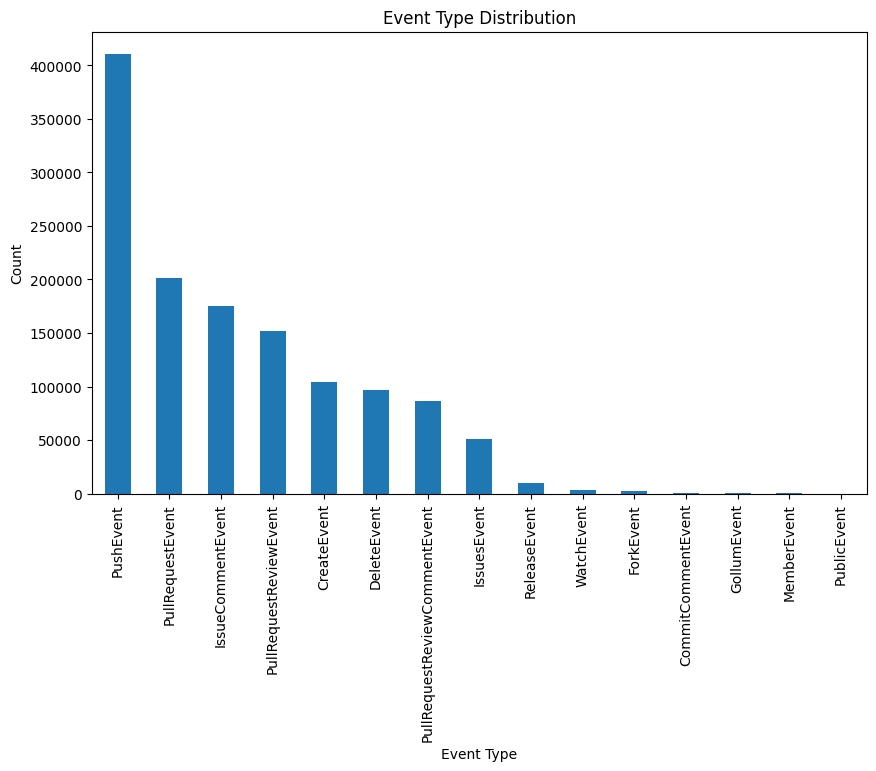

In [87]:
# 按事件类型统计事件分布
event_type_counts = data['event_type'].value_counts()
event_type_counts.to_csv('event_type_counts.csv')

# 可视化
ax=event_type_counts.plot(kind='bar', figsize=(10,6))
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
ax.get_figure().savefig('event_type_counts.png')
plt.show()


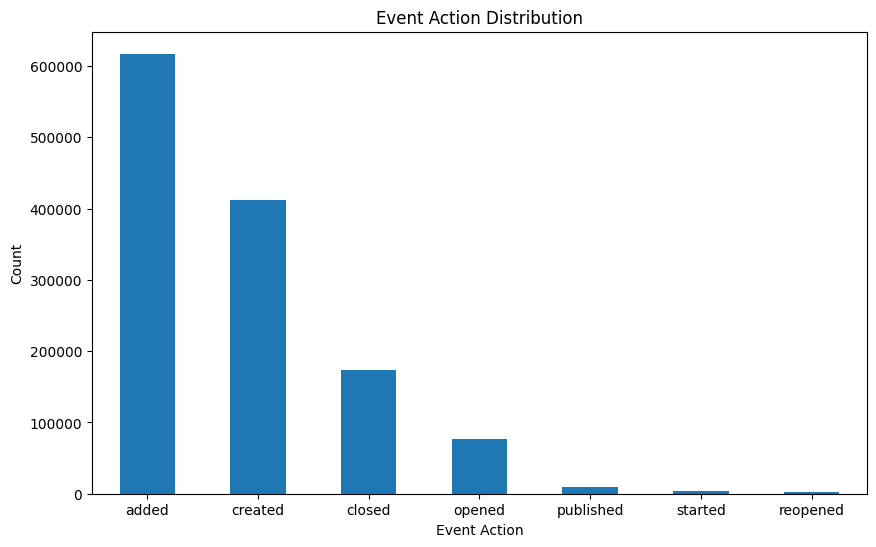

In [88]:
# 按事件行为统计分布
event_action_counts = (data['event_action'].value_counts())
event_action_counts.to_csv('event_action_counts.csv')

# 可视化
ax=event_action_counts.plot(kind='bar', figsize=(10,6))
plt.title('Event Action Distribution')
plt.xlabel('Event Action')
plt.ylabel('Count')
plt.xticks(rotation=0)
ax.get_figure().savefig('event_action_counts.png')
plt.show()
